# TataSteel

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
from plotly.offline import plot 
import plotly.graph_objs as go


#for offline plotting
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [122]:
df=pd.read_csv('TATASTEEL.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,TISCO,EQ,142.35,148.00,153.2,146.10,152.50,152.45,150.92,2003185,3.023164e+13,NaN,NaN,NaN
1,2000-01-04,TISCO,EQ,152.45,150.10,153.0,143.05,151.95,150.80,151.03,1555136,2.348785e+13,NaN,NaN,NaN
2,2000-01-05,TISCO,EQ,150.80,144.60,162.9,144.60,158.00,156.55,156.85,3840284,6.023364e+13,NaN,NaN,NaN
3,2000-01-06,TISCO,EQ,156.55,158.95,169.1,158.95,169.00,168.25,167.61,2560449,4.291530e+13,NaN,NaN,NaN
4,2000-01-07,TISCO,EQ,168.25,173.40,179.0,166.30,170.55,171.95,173.89,3641691,6.332459e+13,NaN,NaN,NaN


In [123]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [124]:
list=['Date','Open','High','Low','Close','VWAP','Volume']

In [125]:
#Important Columns
data=df[['Date','Open','High','Low','Close','VWAP','Volume']]
data.head()

,Date,Open,High,Low,Close,VWAP,Volume
0,2000-01-03,148.00,153.2,146.10,152.45,150.92,2003185
1,2000-01-04,150.10,153.0,143.05,150.80,151.03,1555136
2,2000-01-05,144.60,162.9,144.60,156.55,156.85,3840284
3,2000-01-06,158.95,169.1,158.95,168.25,167.61,2560449
4,2000-01-07,173.40,179.0,166.30,171.95,173.89,3641691


In [126]:
data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
VWAP      0
Volume    0
dtype: int64

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5306 non-null   object 
 1   Open    5306 non-null   float64
 2   High    5306 non-null   float64
 3   Low     5306 non-null   float64
 4   Close   5306 non-null   float64
 5   VWAP    5306 non-null   float64
 6   Volume  5306 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 290.3+ KB


In [128]:
data.describe()

,Open,High,Low,Close,VWAP,Volume
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03
mean,404.253581,411.210460,396.509197,403.553703,404.062991,6.165253e+06
std,187.559958,190.791329,183.858461,187.312178,187.436529,5.329084e+06
min,66.000000,69.700000,66.000000,67.250000,67.970000,2.329100e+04
25%,275.600000,284.412500,270.000000,275.937500,276.935000,2.801380e+06
50%,403.000000,409.375000,396.650000,402.900000,403.430000,4.800300e+06
75%,525.000000,534.725000,516.487500,524.075000,525.230000,7.833888e+06
max,1024.000000,1052.600000,1011.100000,1034.000000,1031.950000,6.428460e+07


In [129]:
#COnverting object to Datetime
data['Date']=pd.to_datetime(data['Date'])

C:\Users\Affex Jain\AppData\Local\Temp\ipykernel_6820\2299553443.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [130]:
print(data.Date.max())
print(data.Date.min())
print(data.Date.max()-data.Date.min())

2021-04-30 00:00:00
2000-01-03 00:00:00
7788 days 00:00:00


#### Data for 7788 Days from  3 Jan 2000 to 30 April 2021.

## Outlier Removal

<AxesSubplot:>

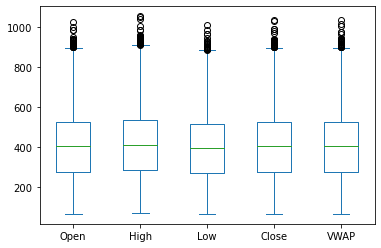

In [131]:
data[['Open','High','Low','Close','VWAP']].plot(kind='box')

In [132]:
#Outlier Removal by iqr method.

list1=['Open','High','Low','Close','VWAP']

for i in list1:
    print(i)
    print(data[i].quantile(0.25))
    print(data[i].quantile(0.75))
    print(data[i].quantile(0.75)-data[i].quantile(0.25))
    print('Upper LImit', data[i].quantile(0.75)+1.5*(data[i].quantile(0.75)-data[i].quantile(0.25)))
    print('Lower LImit', data[i].quantile(0.25)-1.5*(data[i].quantile(0.75)-data[i].quantile(0.25)))
    print('*'*50)

Open
275.6
525.0
249.39999999999998
Upper LImit 899.0999999999999
Lower LImit -98.49999999999994
**************************************************
High
284.41249999999997
534.7249999999999
250.31249999999994
Upper LImit 910.1937499999998
Lower LImit -91.05624999999992
**************************************************
Low
270.0
516.4875
246.48749999999995
Upper LImit 886.2187499999999
Lower LImit -99.73124999999993
**************************************************
Close
275.9375
524.075
248.13750000000005
Upper LImit 896.2812500000001
Lower LImit -96.26875000000007
**************************************************
VWAP
276.935
525.23
248.29500000000002
Upper LImit 897.6725
Lower LImit -95.5075
**************************************************


In [133]:
data['Open']=np.where(data['Open']>899,899,data['Open'])
data['High']=np.where(data['High']>910,910,data['High'])
data['Low']=np.where(data['Low']>886,886,data['Low'])
data['Close']=np.where(data['Close']>896,896,data['Close'])
data['VWAP']=np.where(data['VWAP']>897,897,data['VWAP'])

C:\Users\Affex Jain\AppData\Local\Temp\ipykernel_6820\1842594658.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Affex Jain\AppData\Local\Temp\ipykernel_6820\1842594658.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Affex Jain\AppData\Local\Temp\ipykernel_6820\1842594658.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

<AxesSubplot:>

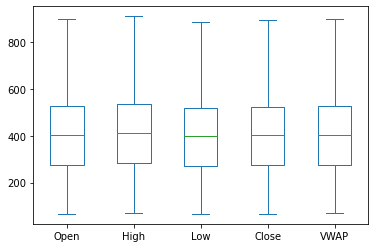

In [134]:
data[['Open','High','Low','Close','VWAP']].plot(kind='box')

### Outliers Removed by IQR method.

### Grpah of TataSteel

In [135]:
layout=go.Layout(
    title='Stock Price of TataSteel',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price'),
)

TataSteel_data=[{'x':data['Date'],'y':data['Close']}]
plot=go.Figure(data=TataSteel_data,layout=layout)

In [136]:
iplot(plot)

### Model Building

In [137]:
from sklearn.model_selection import train_test_split

#for preprossing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#for model Evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [138]:
#Spliting data into Train Test
X=data[['Open','High','Low','VWAP','Volume']]
y=data['Close']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=16,test_size=0.3)

In [139]:
#Feature Scaling
scale=StandardScaler().fit(X_train)

In [140]:
#Creating a model
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [141]:
model.fit(X_train,y_train)

LinearRegression()

In [142]:
y_pred=model.predict(X_test)
print(y_pred)
print(y_test.head())

[215.92018236 822.14221718 268.24194514 ...  88.78314408 249.06796364
 283.25817905]
3923    215.15
2122    816.80
5037    269.60
1926    682.05
2731    624.25
Name: Close, dtype: float64


In [143]:
#Calculating the score
r2_score(y_test,y_pred)

0.9995632189500959

### Predicted values with 99.95% accuracy.

In [144]:
z=X.sample(5)
z

,Open,High,Low,VWAP,Volume
4091,344.00,348.3,336.4,342.08,8832388
4427,694.50,698.8,673.3,686.83,4191994
782,154.00,157.3,154.0,155.75,4249778
3968,240.15,243.5,236.8,239.83,7107867
1602,472.00,514.0,443.0,488.33,4334583


In [145]:
model.predict(z)

array([341.33799147, 682.63483075, 156.20673879, 239.76025947,
       489.12464396])

### predicted Close values for sample data(z).

# Tatamotors

In [146]:
df1=pd.read_csv('TATAMOTORS.csv')
df1.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,TELCO,EQ,201.60,207.4,217.25,207.4,217.0,216.75,214.28,676126,1.448775e+13,NaN,NaN,NaN
1,2000-01-04,TELCO,EQ,216.75,217.0,219.00,206.0,211.9,208.20,209.50,679215,1.422962e+13,NaN,NaN,NaN
2,2000-01-05,TELCO,EQ,208.20,194.0,217.80,194.0,213.1,213.25,210.33,1120951,2.357684e+13,NaN,NaN,NaN
3,2000-01-06,TELCO,EQ,213.25,215.0,229.90,215.0,222.0,222.10,225.29,1968998,4.435932e+13,NaN,NaN,NaN
4,2000-01-07,TELCO,EQ,222.10,224.0,239.90,223.1,239.9,239.90,236.32,2199431,5.197636e+13,NaN,NaN,NaN


In [147]:
tm=df1[list]
tm.head()

,Date,Open,High,Low,Close,VWAP,Volume
0,2000-01-03,207.4,217.25,207.4,216.75,214.28,676126
1,2000-01-04,217.0,219.00,206.0,208.20,209.50,679215
2,2000-01-05,194.0,217.80,194.0,213.25,210.33,1120951
3,2000-01-06,215.0,229.90,215.0,222.10,225.29,1968998
4,2000-01-07,224.0,239.90,223.1,239.90,236.32,2199431


In [148]:
tm.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
VWAP      0
Volume    0
dtype: int64

In [149]:
#COnverting object to Datetime
tm['Date']=pd.to_datetime(tm['Date'])

C:\Users\Affex Jain\AppData\Local\Temp\ipykernel_6820\2903150455.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:>

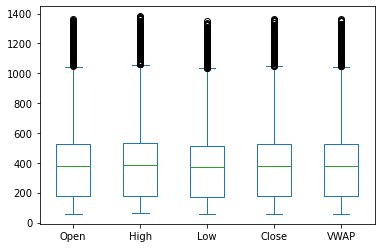

In [150]:
tm[['Open','High','Low','Close','VWAP']].plot(kind='box')

In [151]:
#Outlier Removal by iqr method.

list1=['Open','High','Low','Close','VWAP']

for i in list1:
    print(i)
    print(tm[i].quantile(0.25))
    print(tm[i].quantile(0.75))
    print(tm[i].quantile(0.75)-tm[i].quantile(0.25))
    print('Upper LImit', tm[i].quantile(0.75)+1.5*(tm[i].quantile(0.75)-tm[i].quantile(0.25)))
    print('Lower LImit', tm[i].quantile(0.25)-1.5*(tm[i].quantile(0.75)-tm[i].quantile(0.25)))
    print('*'*50)

Open
174.7625
523.475
348.71250000000003
Upper LImit 1046.54375
Lower LImit -348.30625000000003
**************************************************
High
178.82500000000002
530.8
351.9749999999999
Upper LImit 1058.7624999999998
Lower LImit -349.1374999999998
**************************************************
Low
171.0125
515.9124999999999
344.8999999999999
Upper LImit 1033.2624999999998
Lower LImit -346.3374999999999
**************************************************
Close
174.6
523.1500000000001
348.55000000000007
Upper LImit 1045.9750000000001
Lower LImit -348.225
**************************************************
VWAP
175.1825
523.715
348.5325
Upper LImit 1046.51375
Lower LImit -347.61625000000004
**************************************************


In [152]:
tm['Open']=np.where(tm['Open']>1046,1046,tm['Open'])
tm['High']=np.where(tm['High']>1058,1058,tm['High'])
tm['Low']=np.where(tm['Low']>1033,1033,tm['Low'])
tm['Close']=np.where(tm['Close']>1045,1045,tm['Close'])
tm['VWAP']=np.where(tm['VWAP']>1046,1046,tm['VWAP'])

C:\Users\Affex Jain\AppData\Local\Temp\ipykernel_6820\2512975910.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Affex Jain\AppData\Local\Temp\ipykernel_6820\2512975910.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Affex Jain\AppData\Local\Temp\ipykernel_6820\2512975910.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

<AxesSubplot:>

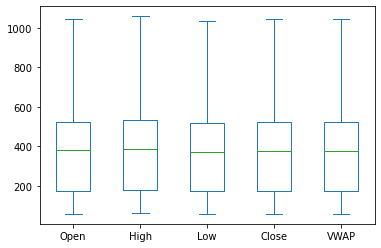

In [153]:
tm[['Open','High','Low','Close','VWAP']].plot(kind='box')

In [154]:
layout=go.Layout(
    title='Stock Price of TataMotors',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price'),
)

TataMotors=[{'x':tm['Date'],'y':tm['Close']}]
plot=go.Figure(data=TataMotors,layout=layout)

In [155]:
iplot(plot)

In [156]:
#Spliting data into Train Test
X_tm=tm[['Open','High','Low','VWAP','Volume']]
y_tm=tm['Close']
X_train_tm,X_test_tm,y_train_tm,y_test_tm=train_test_split(X_tm,y_tm,random_state=16,test_size=0.3)

In [157]:
#Feature Scaling
scale=StandardScaler().fit(X_train_tm)

In [158]:
model_tm=LinearRegression()
model_tm.fit(X_train_tm,y_train_tm)

LinearRegression()

In [159]:
y_pred_tm=model.predict(X_test_tm)
print(y_pred_tm)
print(y_test_tm.head())

[304.69133821 509.04236367  71.94341371 ...  74.90893988 312.81189025
 390.70903533]
3923     303.40
2122     504.60
5037      71.05
1926     698.85
2731    1045.00
Name: Close, dtype: float64


In [160]:
r2_score(y_test_tm,y_pred_tm)

0.9997599549256698

###  Predict with accuracy of 99.97%

In [161]:
a=X_tm.sample(5)
a

,Open,High,Low,VWAP,Volume
2832,1046.00,1058.00,1033.0,1046.00,2224080
4672,217.80,218.50,208.1,213.94,11854170
3135,224.50,226.50,223.8,225.28,6606574
1428,495.50,498.95,489.1,493.17,1086463
4050,385.95,391.00,382.4,387.25,6011729


In [162]:
model_tm.predict(a)

array([1045.14287795,  212.66280961,  225.11246529,  492.32755521,
        387.07166383])

### predicted Close values for sample data(a).